
#Learning Objectives:


* Formulate  the problem
* Load the Data
* Data Exploration
* Clean The Data
* Discover and Visualize the Data to Gain Insights
* Looking for Correlations
* Prepare the Data for Machine Learning Algorithms
* Save Cleaned Data and Download it



#Student Performance

<h3>About Data </h3>


 <h2>Read Dataset Description</h2>
We want to predict students performance in math in secondary education of two high schools. Please read the description of data set before start.

 [Dataset Description](https://archive.ics.uci.edu/ml/datasets/student+performance)

<h3>Import data</h3>
<p>
here link of raw data set: <a href="https://raw.githubusercontent.com/Ruqyai/Course-DS/master/math-raw.csv"> here</a>.

</p>

#Formulate  the problem

We want to predict the Math Final Grade

So How predict the Math Final Grade?!!

Notice the data is labeled (**Supervised Learning**)

Notice the desired output is number (**Regression**)






###Import libraries




In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#Load the Data

###Load the dataset

In [ ]:
file_path = 'https://raw.githubusercontent.com/Ruqyai/Course-DS/master/math-raw.csv'

In [ ]:
#Use the Pandas method read_csv() to load the data from the web address.
df = pd.read_csv(file_path)
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18.0,U,GT3,A,4,4,at_home,teacher,...,4,?,4,1,1,3,NaN,5.0,6,6
1,GP,F,17.0,U,GT3,T,1,1,at_home,other,...,5,?,3,1,1,3,NaN,5.0,5,6
2,GP,Female,15.0,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10.0,7.0,8,10
3,GP,F,15.0,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2.0,15.0,14,15
4,GP,F,16.0,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4.0,6.0,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20.0,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11.0,9.0,9,9
391,MS,M,17.0,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3.0,14.0,16,16
392,MS,M,21.0,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3.0,10.0,8,7
393,MS,M,18.0,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0.0,11.0,12,10


#Clean  the data

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   school      373 non-null    object 
 1   sex         394 non-null    object 
 2   age         394 non-null    float64
 3   address     394 non-null    object 
 4   famsize     395 non-null    object 
 5   Pstatus     395 non-null    object 
 6   Medu        395 non-null    int64  
 7   Fedu        395 non-null    int64  
 8   Mjob        395 non-null    object 
 9   Fjob        395 non-null    object 
 10  reason      395 non-null    object 
 11  guardian    395 non-null    object 
 12  traveltime  395 non-null    int64  
 13  studytime   395 non-null    int64  
 14  failures    393 non-null    float64
 15  schoolsup   395 non-null    object 
 16  famsup      395 non-null    object 
 17  paid        395 non-null    object 
 18  activities  395 non-null    object 
 19  nursery     395 non-null    o


##Missing  Values


#Identify and handle missing values

As we can see, several question marks appeared in the dataframe; those are missing values which may hinder our further analysis.
<div>So, how do we identify all those missing values and deal with them?</div>


<h1>How to work with missing data?</h1>

Steps for working with missing data:
<ol>
    <li>identify missing data</li>
    <li>deal with missing data</li>
    <li>correct data format</li>
</ol>

<h1 id="identify_missing_values">1. Identify missing values</h1>

In [ ]:
missing_data = df.isnull()
missing_data.head(10)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7,True,True,True,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


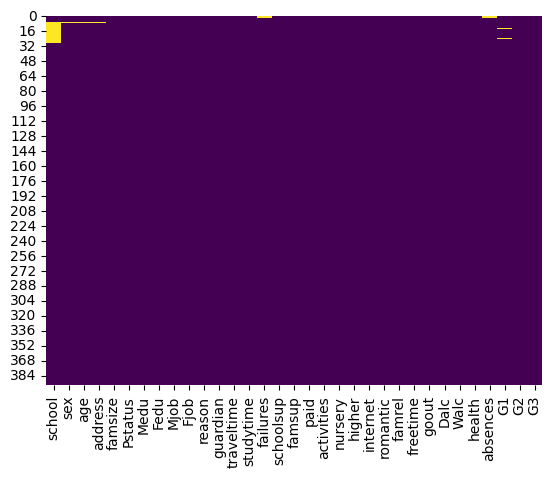

In [ ]:
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.show()

   
   <h4>Convert "?" to NaN</h4>In the house dataset, missing data comes with the question mark "?".We replace "?" with NaN (Not a Number), which is Python's default missing value marker, for reasons of computational speed and convenience. Here we use the function:  <pre>.replace(A, B, inplace = True) </pre>to replace A by B




In [ ]:
import numpy as np

# replace "?" to NaN
df.replace("?", np.nan, inplace = True)
df.head(10)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18.0,U,GT3,A,4,4,at_home,teacher,...,4,NaN,4,1,1,3,NaN,5.0,6,6
1,GP,F,17.0,U,GT3,T,1,1,at_home,other,...,5,NaN,3,1,1,3,NaN,5.0,5,6
2,GP,Female,15.0,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10.0,7.0,8,10
3,GP,F,15.0,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2.0,15.0,14,15
4,GP,F,16.0,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4.0,6.0,10,10
5,GP,Male,16.0,U,LE3,T,4,3,services,other,...,5,4,2,1,2,5,10.0,15.0,15,15
6,GP,M,16.0,U,LE3,T,2,2,other,other,...,4,4,4,1,1,3,0.0,12.0,12,11
7,NaN,NaN,NaN,NaN,GT3,A,4,4,other,teacher,...,4,1,4,1,1,1,6.0,6.0,5,6
8,NaN,M,15.0,U,LE3,A,3,2,services,other,...,4,2,2,1,1,1,0.0,16.0,18,19
9,NaN,M,15.0,U,GT3,T,3,4,other,other,...,5,5,1,1,1,5,0.0,14.0,15,15


<h1 id="deal_missing_values">2. Deal with missing data</h1>
<b>How to deal with missing data?</b>

<ol>
    <li>drop data<br>
        a. drop the whole row<br>
        b. drop the whole column
    </li>
    <li>replace data (impute)<br>
        a. replace it by mean or median <br>
        b. replace it by frequency<br>
        c. replace it based on inference or other functions
    </li>
</ol>

<h3>Drop the whole row</h3>

In [ ]:
df.dropna(axis=0, inplace=True)
df.head(10)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
2,GP,Female,15.0,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10.0,7.0,8,10
3,GP,F,15.0,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2.0,15.0,14,15
4,GP,F,16.0,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4.0,6.0,10,10
5,GP,Male,16.0,U,LE3,T,4,3,services,other,...,5,4,2,1,2,5,10.0,15.0,15,15
6,GP,M,16.0,U,LE3,T,2,2,other,other,...,4,4,4,1,1,3,0.0,12.0,12,11
29,GP,M,16.0,U,GT3,T,4,4,teacher,teacher,...,4,4,5,5,5,5,16.0,10.0,12,11
30,GP,M,15.0,U,GT3,T,4,4,health,services,...,5,4,2,3,4,5,0.0,9.0,11,12
31,GP,M,15.0,U,GT3,T,4,4,services,services,...,4,3,1,1,1,5,0.0,17.0,16,17
32,GP,M,15.0,R,GT3,T,4,3,teacher,at_home,...,4,5,2,1,1,5,0.0,17.0,16,16
33,GP,M,15.0,U,LE3,T,3,3,other,other,...,5,3,2,1,1,2,0.0,8.0,10,12


<h3>Drop the whole column</h3>

In [ ]:
df.dropna(axis=1, inplace=True)
df.head(10)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
2,GP,Female,15.0,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10.0,7.0,8,10
3,GP,F,15.0,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2.0,15.0,14,15
4,GP,F,16.0,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4.0,6.0,10,10
5,GP,Male,16.0,U,LE3,T,4,3,services,other,...,5,4,2,1,2,5,10.0,15.0,15,15
6,GP,M,16.0,U,LE3,T,2,2,other,other,...,4,4,4,1,1,3,0.0,12.0,12,11
29,GP,M,16.0,U,GT3,T,4,4,teacher,teacher,...,4,4,5,5,5,5,16.0,10.0,12,11
30,GP,M,15.0,U,GT3,T,4,4,health,services,...,5,4,2,3,4,5,0.0,9.0,11,12
31,GP,M,15.0,U,GT3,T,4,4,services,services,...,4,3,1,1,1,5,0.0,17.0,16,17
32,GP,M,15.0,R,GT3,T,4,3,teacher,at_home,...,4,5,2,1,1,5,0.0,17.0,16,16
33,GP,M,15.0,U,LE3,T,3,3,other,other,...,5,3,2,1,1,2,0.0,8.0,10,12


<h3> Replace it by mean </h3>

مدري هنا غيرت

In [ ]:
df_numeric = df.select_dtypes(include=[np.number])  # Select only numeric columns
df[df_numeric.columns] = df_numeric.fillna(df_numeric.mean())  # Fill NaN in numeric columns with mean


<h3>Replace by frequency</h3>

In [ ]:
for column in df.select_dtypes(include='object').columns:
    df[column].fillna(df[column].value_counts().idxmax(), inplace=True)
df.head(10)

<ipython-input-12-354e068644f5>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].value_counts().idxmax(), inplace=True)
<ipython-input-12-354e068644f5>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inpla

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
2,GP,Female,15.0,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10.0,7.0,8,10
3,GP,F,15.0,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2.0,15.0,14,15
4,GP,F,16.0,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4.0,6.0,10,10
5,GP,Male,16.0,U,LE3,T,4,3,services,other,...,5,4,2,1,2,5,10.0,15.0,15,15
6,GP,M,16.0,U,LE3,T,2,2,other,other,...,4,4,4,1,1,3,0.0,12.0,12,11
29,GP,M,16.0,U,GT3,T,4,4,teacher,teacher,...,4,4,5,5,5,5,16.0,10.0,12,11
30,GP,M,15.0,U,GT3,T,4,4,health,services,...,5,4,2,3,4,5,0.0,9.0,11,12
31,GP,M,15.0,U,GT3,T,4,4,services,services,...,4,3,1,1,1,5,0.0,17.0,16,17
32,GP,M,15.0,R,GT3,T,4,3,teacher,at_home,...,4,5,2,1,1,5,0.0,17.0,16,16
33,GP,M,15.0,U,LE3,T,3,3,other,other,...,5,3,2,1,1,2,0.0,8.0,10,12


<h3> Replace by sklearn.impute </h3>

In [ ]:
#from sklearn.impute import SimpleImputer

# Replace missing values using sklearn's SimpleImputer
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
df_numeric = df.select_dtypes(include=[np.number])
df[df_numeric.columns] = imputer.fit_transform(df_numeric)
df.head(10)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
2,GP,Female,15.0,U,LE3,T,1.0,1.0,at_home,other,...,4.0,3,2.0,2.0,3.0,3.0,10.0,7.0,8.0,10.0
3,GP,F,15.0,U,GT3,T,4.0,2.0,health,services,...,3.0,2,2.0,1.0,1.0,5.0,2.0,15.0,14.0,15.0
4,GP,F,16.0,U,GT3,T,3.0,3.0,other,other,...,4.0,3,2.0,1.0,2.0,5.0,4.0,6.0,10.0,10.0
5,GP,Male,16.0,U,LE3,T,4.0,3.0,services,other,...,5.0,4,2.0,1.0,2.0,5.0,10.0,15.0,15.0,15.0
6,GP,M,16.0,U,LE3,T,2.0,2.0,other,other,...,4.0,4,4.0,1.0,1.0,3.0,0.0,12.0,12.0,11.0
29,GP,M,16.0,U,GT3,T,4.0,4.0,teacher,teacher,...,4.0,4,5.0,5.0,5.0,5.0,16.0,10.0,12.0,11.0
30,GP,M,15.0,U,GT3,T,4.0,4.0,health,services,...,5.0,4,2.0,3.0,4.0,5.0,0.0,9.0,11.0,12.0
31,GP,M,15.0,U,GT3,T,4.0,4.0,services,services,...,4.0,3,1.0,1.0,1.0,5.0,0.0,17.0,16.0,17.0
32,GP,M,15.0,R,GT3,T,4.0,3.0,teacher,at_home,...,4.0,5,2.0,1.0,1.0,5.0,0.0,17.0,16.0,16.0
33,GP,M,15.0,U,LE3,T,3.0,3.0,other,other,...,5.0,3,2.0,1.0,1.0,2.0,0.0,8.0,10.0,12.0


<h1 id="correct_data_format">3. Correct data format</h1>
<b>We are almost there!</b>
<p>The last step in data cleaning is checking and making sure that all data is in the correct format (int, float, text or other).</p>

In Pandas, we use
<p><b>.dtype</b> to check the data type</p>
<p><b>.astype</b> to change the data type</p>

In [ ]:
print(df.columns)

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')


In [ ]:
numeric_columns = ['age', 'failures', 'absences', 'G1', 'G2', 'G3']

for column in numeric_columns:
    df[column] = df[column].astype('float')


print(df.dtypes)


school         object
sex            object
age           float64
address        object
famsize        object
Pstatus        object
Medu          float64
Fedu          float64
Mjob           object
Fjob           object
reason         object
guardian       object
traveltime    float64
studytime     float64
failures      float64
schoolsup      object
famsup         object
paid           object
activities     object
nursery        object
higher         object
internet       object
romantic       object
famrel        float64
freetime       object
goout         float64
Dalc          float64
Walc          float64
health        float64
absences      float64
G1            float64
G2            float64
G3            float64
dtype: object


<h3>Remove any duplicates</h3>


In [ ]:
# Remove duplicates
df.drop_duplicates(inplace=True)
df.head(10)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
2,GP,Female,15.0,U,LE3,T,1.0,1.0,at_home,other,...,4.0,3,2.0,2.0,3.0,3.0,10.0,7.0,8.0,10.0
3,GP,F,15.0,U,GT3,T,4.0,2.0,health,services,...,3.0,2,2.0,1.0,1.0,5.0,2.0,15.0,14.0,15.0
4,GP,F,16.0,U,GT3,T,3.0,3.0,other,other,...,4.0,3,2.0,1.0,2.0,5.0,4.0,6.0,10.0,10.0
5,GP,Male,16.0,U,LE3,T,4.0,3.0,services,other,...,5.0,4,2.0,1.0,2.0,5.0,10.0,15.0,15.0,15.0
6,GP,M,16.0,U,LE3,T,2.0,2.0,other,other,...,4.0,4,4.0,1.0,1.0,3.0,0.0,12.0,12.0,11.0
29,GP,M,16.0,U,GT3,T,4.0,4.0,teacher,teacher,...,4.0,4,5.0,5.0,5.0,5.0,16.0,10.0,12.0,11.0
30,GP,M,15.0,U,GT3,T,4.0,4.0,health,services,...,5.0,4,2.0,3.0,4.0,5.0,0.0,9.0,11.0,12.0
31,GP,M,15.0,U,GT3,T,4.0,4.0,services,services,...,4.0,3,1.0,1.0,1.0,5.0,0.0,17.0,16.0,17.0
32,GP,M,15.0,R,GT3,T,4.0,3.0,teacher,at_home,...,4.0,5,2.0,1.0,1.0,5.0,0.0,17.0,16.0,16.0
33,GP,M,15.0,U,LE3,T,3.0,3.0,other,other,...,5.0,3,2.0,1.0,1.0,2.0,0.0,8.0,10.0,12.0


<h3>Data Standardization</h3>
<p>
Data is usually collected from different agencies with different formats.
(Data Standardization is also a term for a particular type of data normalization)
</p>
    
<b>What is Standardization?</b>
<p>Standardization is the process of transforming data into a common format which allows the researcher to make the meaningful comparison.
</p>

<h3>Data Normalization </h3>

<b>Why normalization?</b>
<p>Normalization is the process of transforming values of several variables into a similar range. Typical normalizations include scaling the variable so the variable average is 0, scaling the variable so the variance is 1, or scaling variable so the variable values range from 0 to 1
</p>



---

---





##Exploratory Data Analysis (EDA) and Data Visualization


Categorical variables are variables that describe a 'characteristic' of a data unit, and are selected from a small group of categories. The categorical variables can have the type "object" or "int64". A good way to visualize categorical variables is by using boxplots.


<h3>Identify Outliers <h3>

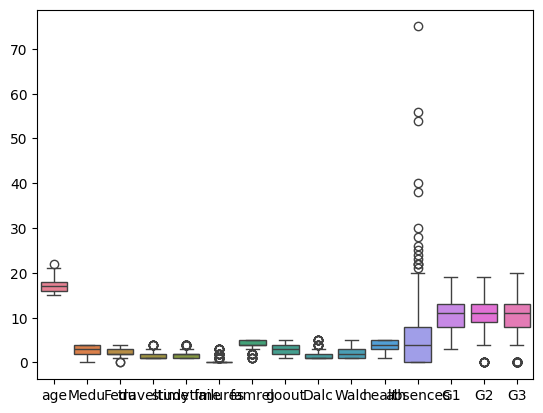

In [ ]:
sns.boxplot(data=df)
plt.show()

<h3>Remove Outliers</h3>

In [ ]:
numeric_columns = df.select_dtypes(include=[np.number]).columns
Q1 = df[numeric_columns].quantile(0.25)
Q3 = df[numeric_columns].quantile(0.75)

IQR = Q3 - Q1

df_cleaned = df[~((df[numeric_columns] < (Q1 - 1.5 * IQR)) | (df[numeric_columns] > (Q3 + 1.5 * IQR))).any(axis=1)]


df_cleaned.head(10)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
3,GP,F,15.0,U,GT3,T,4.0,2.0,health,services,...,3.0,2,2.0,1.0,1.0,5.0,2.0,15.0,14.0,15.0
4,GP,F,16.0,U,GT3,T,3.0,3.0,other,other,...,4.0,3,2.0,1.0,2.0,5.0,4.0,6.0,10.0,10.0
5,GP,Male,16.0,U,LE3,T,4.0,3.0,services,other,...,5.0,4,2.0,1.0,2.0,5.0,10.0,15.0,15.0,15.0
6,GP,M,16.0,U,LE3,T,2.0,2.0,other,other,...,4.0,4,4.0,1.0,1.0,3.0,0.0,12.0,12.0,11.0
30,GP,M,15.0,U,GT3,T,4.0,4.0,health,services,...,5.0,4,2.0,3.0,4.0,5.0,0.0,9.0,11.0,12.0
31,GP,M,15.0,U,GT3,T,4.0,4.0,services,services,...,4.0,3,1.0,1.0,1.0,5.0,0.0,17.0,16.0,17.0
32,GP,M,15.0,R,GT3,T,4.0,3.0,teacher,at_home,...,4.0,5,2.0,1.0,1.0,5.0,0.0,17.0,16.0,16.0
33,GP,M,15.0,U,LE3,T,3.0,3.0,other,other,...,5.0,3,2.0,1.0,1.0,2.0,0.0,8.0,10.0,12.0
34,GP,M,16.0,U,GT3,T,3.0,2.0,other,other,...,5.0,4,3.0,1.0,1.0,5.0,0.0,12.0,14.0,15.0
35,GP,F,15.0,U,GT3,T,2.0,3.0,other,other,...,3.0,5,1.0,1.0,1.0,5.0,0.0,8.0,7.0,6.0


##Discover and Visualize the Data to Gain Insights

<h4>Individual Variables </h4>


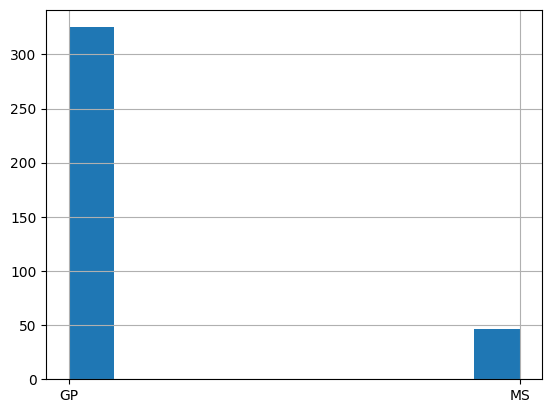

In [ ]:
df['school'].hist()
plt.show()

<h4>Relationships Between Variables</h4>

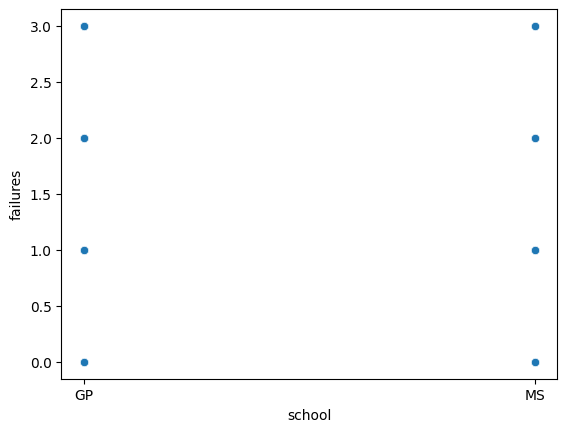

In [ ]:
sns.scatterplot(x='school', y='failures', data=df)
plt.show()

<h4>Weak and Strong Relationships<h4>

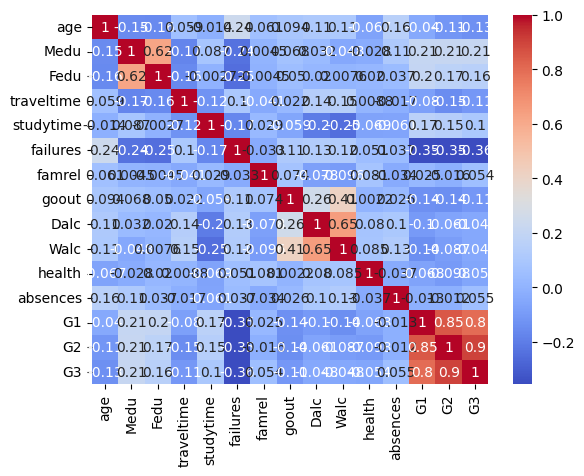

In [ ]:
numeric_columns = df.select_dtypes(include=[np.number])

correlation_matrix = numeric_columns.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.show()


##Looking for Correlations

<h3>Correlation and Causation</h3>

<b> Correlation: </b> a measure of the extent of interdependence between variables.

<b> Causation: </b>the relationship between cause and effect between two variables.

It is important to know the difference between these two and that correlation does not imply causation. Determining correlation is much simpler the determining causation as causation may require independent experimentation.

In [ ]:
print(df.dtypes)


school         object
sex            object
age           float64
address        object
famsize        object
Pstatus        object
Medu          float64
Fedu          float64
Mjob           object
Fjob           object
reason         object
guardian       object
traveltime    float64
studytime     float64
failures      float64
schoolsup      object
famsup         object
paid           object
activities     object
nursery        object
higher         object
internet       object
romantic       object
famrel        float64
freetime       object
goout         float64
Dalc          float64
Walc          float64
health        float64
absences      float64
G1            float64
G2            float64
G3            float64
dtype: object


In [ ]:
df['school'] = pd.to_numeric(df['Fjob'], errors='coerce')
df = df.dropna()

correlation = df.corr()
print(correlation)



            school  sex  age  address  famsize  Pstatus  Medu  Fedu  Mjob  \
school         NaN  NaN  NaN      NaN      NaN      NaN   NaN   NaN   NaN   
sex            NaN  NaN  NaN      NaN      NaN      NaN   NaN   NaN   NaN   
age            NaN  NaN  NaN      NaN      NaN      NaN   NaN   NaN   NaN   
address        NaN  NaN  NaN      NaN      NaN      NaN   NaN   NaN   NaN   
famsize        NaN  NaN  NaN      NaN      NaN      NaN   NaN   NaN   NaN   
Pstatus        NaN  NaN  NaN      NaN      NaN      NaN   NaN   NaN   NaN   
Medu           NaN  NaN  NaN      NaN      NaN      NaN   NaN   NaN   NaN   
Fedu           NaN  NaN  NaN      NaN      NaN      NaN   NaN   NaN   NaN   
Mjob           NaN  NaN  NaN      NaN      NaN      NaN   NaN   NaN   NaN   
Fjob           NaN  NaN  NaN      NaN      NaN      NaN   NaN   NaN   NaN   
reason         NaN  NaN  NaN      NaN      NaN      NaN   NaN   NaN   NaN   
guardian       NaN  NaN  NaN      NaN      NaN      NaN   NaN   NaN   NaN   

#Feature  Engineering

* Construct new features
* Combine two features or uncombine a feature
*	Select features

<h3>Conclusion: Important Variables</h3>
We now have a better idea of what our data looks like and which variables are important to take into account when predicting the house price.

##Select features

In [ ]:
print(correlation.columns)


Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')


In [ ]:
# TODO: Select the important features
print(correlation)



            school  sex  age  address  famsize  Pstatus  Medu  Fedu  Mjob  \
school         NaN  NaN  NaN      NaN      NaN      NaN   NaN   NaN   NaN   
sex            NaN  NaN  NaN      NaN      NaN      NaN   NaN   NaN   NaN   
age            NaN  NaN  NaN      NaN      NaN      NaN   NaN   NaN   NaN   
address        NaN  NaN  NaN      NaN      NaN      NaN   NaN   NaN   NaN   
famsize        NaN  NaN  NaN      NaN      NaN      NaN   NaN   NaN   NaN   
Pstatus        NaN  NaN  NaN      NaN      NaN      NaN   NaN   NaN   NaN   
Medu           NaN  NaN  NaN      NaN      NaN      NaN   NaN   NaN   NaN   
Fedu           NaN  NaN  NaN      NaN      NaN      NaN   NaN   NaN   NaN   
Mjob           NaN  NaN  NaN      NaN      NaN      NaN   NaN   NaN   NaN   
Fjob           NaN  NaN  NaN      NaN      NaN      NaN   NaN   NaN   NaN   
reason         NaN  NaN  NaN      NaN      NaN      NaN   NaN   NaN   NaN   
guardian       NaN  NaN  NaN      NaN      NaN      NaN   NaN   NaN   NaN   

In [ ]:
if 'target_variable' in correlation.columns:
    important_features = correlation[abs(correlation['target_variable']) > 0.5].index.tolist()
    print(important_features)
else:
   print("The 'target_variable' column is not present in the DataFrame.")



The 'target_variable' column is not present in the DataFrame.


<h3>Save Cleaned Data and Download it <h3>

#Choose and  fit model
We will continue tomorrow ...

